### Fetch the zip file

In [1]:
! wget https://databank.worldbank.org/data/download/WDI_csv.zip

--2022-02-13 19:50:38--  https://databank.worldbank.org/data/download/WDI_csv.zip
Resolving databank.worldbank.org (databank.worldbank.org)... 192.86.98.102
Connecting to databank.worldbank.org (databank.worldbank.org)|192.86.98.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67669068 (65M) [application/x-zip-compressed]
Saving to: ‘WDI_csv.zip’

WDI_csv.zip          22%[===>                ]  14,25M   652KB/s    in 23s     

2022-02-13 19:51:09 (641 KB/s) - Read error at byte 14942208/67669068 (Connection reset by peer). Retrying.

--2022-02-13 19:51:10--  (try: 2)  https://databank.worldbank.org/data/download/WDI_csv.zip
Connecting to databank.worldbank.org (databank.worldbank.org)|192.86.98.102|:443... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 67669068 (65M), 52726860 (50M) remaining [application/x-zip-compressed]
Saving to: ‘WDI_csv.zip’

WDI_csv.zip         100%[++++===============>]  64,53M   658KB/s    in 79s    

#### Unzip

In [2]:
!unzip WDI_csv.zip -d data

Archive:  WDI_csv.zip
  inflating: data/WDIData.csv        
  inflating: data/WDICountry.csv     
  inflating: data/WDISeries.csv      
  inflating: data/WDICountry-Series.csv  
  inflating: data/WDISeries-Time.csv  
  inflating: data/WDIFootNote.csv    


In [42]:
# Import libraries
import pandas as pd
import sqlite3
import numpy as np

# ignore warnings are they are not relevent here. Code displays `FutureWarning` which we can ignore
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Load dataframes
df_data = pd.read_csv("data/WDIData.csv")
df_country = pd.read_csv("data/WDICountry.csv")
df_country_series = pd.read_csv("data/WDICountry-Series.csv")
df_WDIFootNote = pd.read_csv("data/WDIFootNote.csv")
df_series = pd.read_csv("data/WDISeries.csv")

df_data.columns = df_data.columns.str.replace(" ", "_")
df_data = df_data.drop(['Unnamed:_65'], axis=1, errors='ignore')

df_country.columns = df_country.columns.str.replace(" ", "_")
df_country_series.columns = df_country_series.columns.str.replace(" ", "_")
df_WDIFootNote.columns = df_WDIFootNote.columns.str.replace(" ", "_")
df_series.columns = df_series.columns.str.replace(" ", "_")

In [5]:
df_country.head()

,Country_Code,Short_Name,Table_Name,Long_Name,2-alpha_code,Currency_Unit,Special_Notes,Region,Income_Group,WB-2_code,...,Government_Accounting_concept,IMF_data_dissemination_standard,Latest_population_census,Latest_household_survey,Source_of_most_recent_Income_and_expenditure_data,Vital_registration_complete,Latest_agricultural_census,Latest_industrial_data,Latest_trade_data,Unnamed:_30
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,...,NaN,Enhanced General Data Dissemination System (e-...,2020 (expected),NaN,NaN,Yes,NaN,NaN,2018.0,NaN
1,AFE,Africa Eastern and Southern,Africa Eastern and Southern,Africa Eastern and Southern,ZH,NaN,"26 countries, stretching from the Red Sea in t...",NaN,NaN,ZH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0,NaN
3,AFW,Africa Western and Central,Africa Western and Central,Africa Western and Central,ZI,NaN,"22 countries, stretching from the westernmost ...",NaN,NaN,ZI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2018.0,NaN


In [6]:
df_series.head()

,Series_Code,Topic,Indicator_Name,Short_definition,Long_definition,Unit_of_measure,Periodicity,Base_Period,Other_notes,Aggregation_method,...,Notes_from_original_source,General_comments,Source,Statistical_concept_and_methodology,Development_relevance,Related_source_links,Other_web_links,Related_indicators,License_Type,Unnamed:_20
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer produc...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
2,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare ...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
3,AG.LND.AGRI.K2,Environment: Land use,Agricultural land (sq. km),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agricultural land constitutes only a part of a...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
4,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agriculture is still a major sector in many ec...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN


In [7]:
df_data.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,15.981256,16.320475,16.643243,16.994695,17.313168,17.604950,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,28.381836,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,15.295950,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN
3,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,65.470615,66.303599,66.496010,65.828988,66.926692,68.722184,71.085418,71.994933,73.589886,NaN
4,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df2 = df_data[df_data['Country_Name'].isin(["Upper middle income", "Lower middle income", "High income", "Low income"])]
c_names = ['Country_Name','Country_Code', 'Indicator_Name', 'Indicator_Code']

r = [str(i) for i in range(1960, 2000)]
df2.drop(r + ['2020'], axis=1, inplace=True)
df2 = df2.melt(id_vars=c_names, 
        var_name="Year", 
        value_name="Value")
df2 = df2.dropna()

filtered_indicators = df2.groupby(['Indicator_Name', 'Country_Name'])['Value'].count().reset_index()

filtered_indicators = filtered_indicators[filtered_indicators['Value'] == 20]['Indicator_Name'].unique()

print(f"Selected indicators counts {len(filtered_indicators)}")

df_series['CAN_BE_USED'] = np.where(df_series['Indicator_Name'].isin(filtered_indicators), True, False)

Selected indicators counts 647


# Write prepared dataset to sqlite database

In [9]:
conn = sqlite3.connect('data/data.db')
df_data.to_sql('WDIData', conn, if_exists='replace', index=False)
df_country.to_sql('WDICountry', conn, if_exists='replace', index=False) 
df_country_series.to_sql('WDICountrySeries', conn, if_exists='replace', index=False) 
df_WDIFootNote.to_sql('WDIFootNote', conn, if_exists='replace', index=False) 
df_series.to_sql('WDISeries', conn, if_exists='replace', index=False)
conn.close()

# Explore the database

In [10]:
%load_ext sql
%config SqlMagic.displaycon = False
%config SqlMagic.feedback = False
%sql sqlite:///data/data.db

Total number of countries: 216


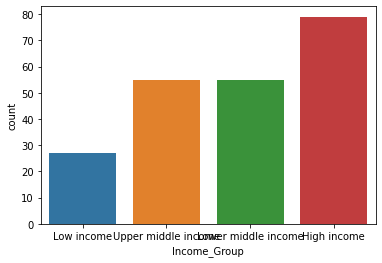

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

query = 'select Income_Group from WDICountry where WDICountry.Income_Group is not NULL'
conn = sqlite3.connect('data/data.db')
income_groups = pd.read_sql(query, con = conn)

print(f"Total number of countries: {income_groups.shape[0]}")
sns.countplot(result['Income_Group'])
conn.close()

In [11]:
sample_data = %sql select * from WDIData limit 5;
display(sample_data)

Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Africa Eastern and Southern,AFE,Access to clean fuels and technologies for cooking (% of population),EG.CFT.ACCS.ZS,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,12.205985334256,12.5493332143826,12.8877052744847,13.2263347774934,13.5755915831281,13.9243539706952,14.2660310520972,14.5962971181626,14.9552860566119,15.2810233296453,15.6312911024101,15.9812561302977,16.320474865037,16.6432428558172,16.9946949543723,17.3131682773135,17.6049500630141,None,None,None,None
Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,20.0860066130196,23.1031784776438,24.2234301519858,25.0231841252266,26.1763357723345,23.621498439778,27.2994330458403,28.737952342644,28.813735402838,27.4830612476805,28.2333728874701,28.3818359876251,32.2240274434276,32.0464780952398,31.3235788003652,33.3121631315881,38.3804331871331,39.754201347135,42.1682410699846,43.6406611120552,None
Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural population)",EG.ELC.ACCS.RU.ZS,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,8.49160997191625,13.2018746955682,15.2093473536694,13.8135351072229,15.4236146358427,10.9588403149893,16.7624691704676,14.417101517166,16.9779753635741,18.1733410522112,16.2410638636384,15.2959503612632,20.5253527781327,19.4613833438545,17.790698468584,16.5534701416911,23.9078966279348,24.6247249863346,26.8138996635713,28.8411502327975,None
Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban population)",EG.ELC.ACCS.UR.ZS,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,56.0834516422826,54.7701226470266,56.1023300404056,57.0943101230703,57.836866299283,58.9533652971299,59.5469745890136,59.5989593932235,60.9834004395019,61.2272550575374,62.5208242745159,65.4706154133,66.303599202538,66.4960101543106,65.8289881700667,66.9266915686378,68.7221844313438,71.0854179924979,71.9949328691005,73.5898862435969,None
Africa Eastern and Southern,AFE,Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),FX.OWN.TOTL.ZS,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [19]:
topics = %sql select TOPIC, count(Indicator_Name) from WDISERIES group by topic order by topic asc;
display(topics)

Topic,count(Indicator_Name)
Economic Policy & Debt: Balance of payments: Capital & financial account,11
Economic Policy & Debt: Balance of payments: Current account: Balances,4
"Economic Policy & Debt: Balance of payments: Current account: Goods, services & income",22
Economic Policy & Debt: Balance of payments: Current account: Transfers,7
Economic Policy & Debt: Balance of payments: Reserves & other items,6
Economic Policy & Debt: External debt: Debt outstanding,10
Economic Policy & Debt: External debt: Debt ratios & other items,11
Economic Policy & Debt: External debt: Debt service,4
Economic Policy & Debt: External debt: Net flows,20
Economic Policy & Debt: National accounts: Adjusted savings & income,28


# Create a sample tree

In [27]:
indicators=['Foreign direct investment, net outflows (BoP, current US$)',
            'School enrollment, primary (% gross)',
            'Access to electricity (% of population)',
            'Secondary education, pupils']
year_min = 2000
year_max = 2019

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from tree_rules import rules

i = "'" + "', '".join(indicators) + "'"
parameters = {}

query = f'''
select WDISeries.Topic, WDICountry.Income_Group, WDIData.*
    from WDIData 
    JOIN WDISeries ON WDIData.Indicator_Name = WDISeries.Indicator_Name
    JOIN WDICountry ON WDICountry.Country_Code = WDIData.Country_Code
    where 
    WDISeries.Indicator_Name in ({i})
    and WDICountry.Income_Group is not NULL;
    '''

conn = sqlite3.connect('data/data.db')

df_data_cluster = pd.read_sql(query, con = conn)
non_year_cols = ["Country_Name", "Country_Code", "Income_Group", "Indicator_Name", "Topic", "Indicator_Code"]
dd = df_data_cluster.melt(id_vars= non_year_cols, 
        var_name="Year", 
        value_name="Value")

years = [str(i) for i in range(year_min, year_max +1)]
dd = dd[dd['Year'].isin(years)]

logger.info(f"Dataset size after filtering: {dd.shape}")
result = dd.groupby(non_year_cols)["Value"].mean().round(2).reset_index()[["Indicator_Name","Country_Name", "Income_Group", "Value"]]
result = result.groupby(['Country_Name' ,'Income_Group','Indicator_Name'])['Value'].first().unstack().reset_index()
logger.info(result.shape)

result.drop('Country_Name', axis=1, inplace=True)

result.fillna(result.mean(), inplace=True)
X = result.drop('Income_Group',axis=1)
y = result[['Income_Group']]

target_names = list(result['Income_Group'].unique())
feature_names = list(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

criterion = parameters.get('criterion', "gini")
random_state = int(parameters.get('random_state', 42))
max_depth = int(parameters.get('max_depth', 5))
min_samples_leaf = int(parameters.get('min_samples_leaf', 5))


clf_model = DecisionTreeClassifier(criterion=criterion, random_state=random_state, max_depth=max_depth, min_samples_leaf=min_samples_leaf)   
clf_model.fit(X_train,y_train)
y_predict = clf_model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)

tree_rules = rules(clf_model,feature_names, target_names)

print('accuracy', accuracy)

accuracy 0.7692307692307693


# Print tree

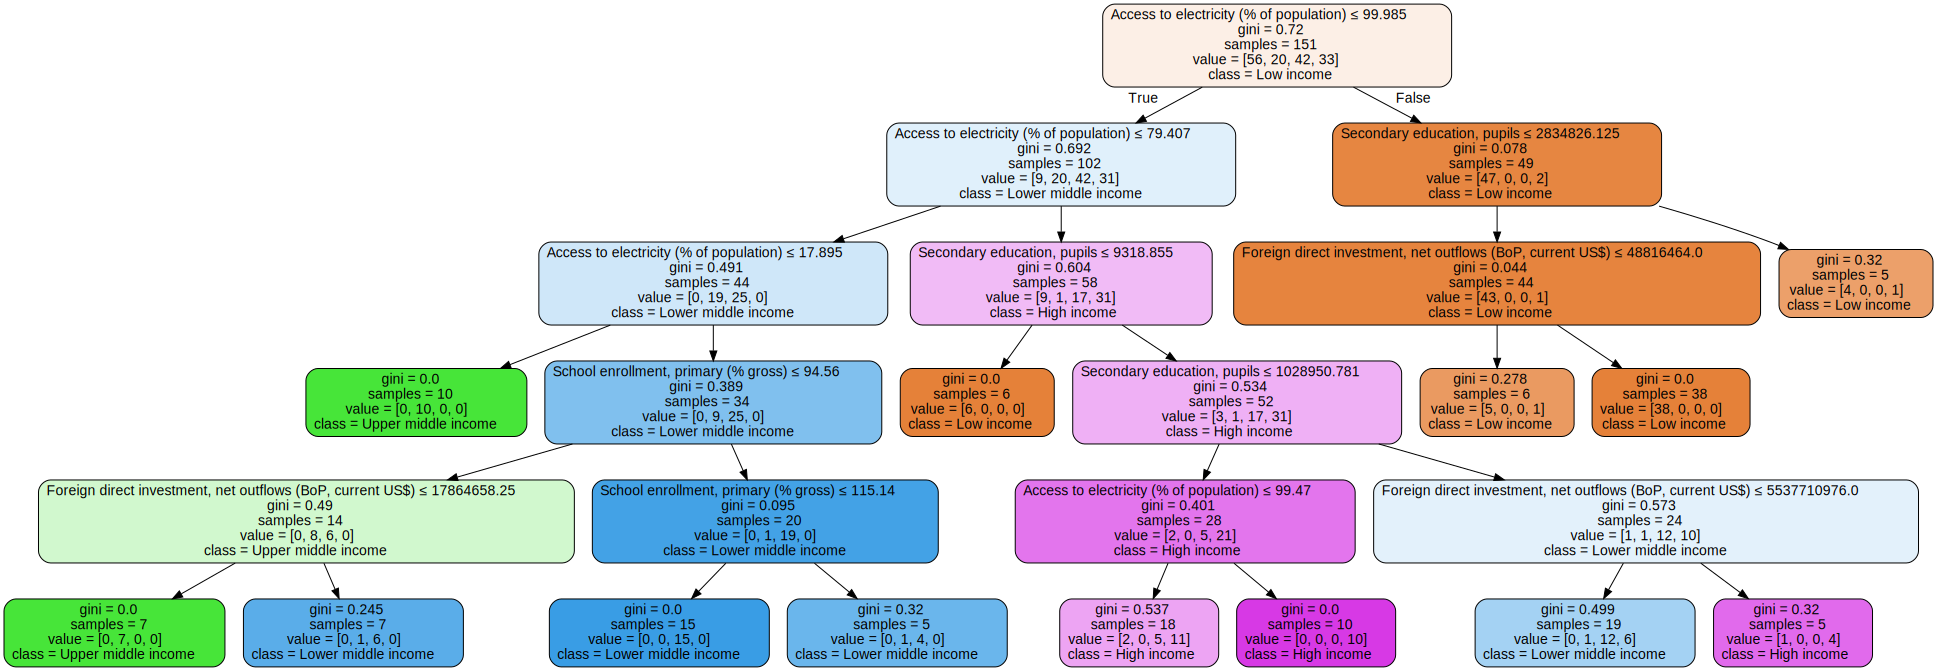

In [47]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf_model,
                                out_file=None, 
                      feature_names=feature_names,  
                      class_names=target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph

# Print tree in json form

In [48]:
# This json (tree) generated from user selected indicators will be used in frontend to display the tree 
tree_rules

{'name': 'Access to electricity (% of population) > 99.98500061035156',
 'label': 'Access to electricity (% of population)',
 'children': [{'name': 'Secondary education, pupils > 2834826.125',
   'label': 'Secondary education, pupils',
   'children': [{'other': '4 of Low income, 0 of Upper middle income, 0 of Lower middle income, 1 of High income',
     'label': 'Low income',
     'name': 'Low income'},
    {'name': 'Foreign direct investment, net outflows (BoP, current US$) > 48816464.0',
     'label': 'Foreign direct investment, net outflows (BoP, current US$)',
     'children': [{'other': '38 of Low income, 0 of Upper middle income, 0 of Lower middle income, 0 of High income',
       'label': 'Low income',
       'name': 'Low income'},
      {'other': '5 of Low income, 0 of Upper middle income, 0 of Lower middle income, 1 of High income',
       'label': 'Low income',
       'name': 'Low income'}]}]},
  {'name': 'Access to electricity (% of population) > 79.40695190429688',
   'labe